In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
%matplotlib inline

In [3]:
# Read the data from file
# file is as same locaton where python file is
data = pd.read_csv("train.csv")

In [4]:
# Information about data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# Top 10 rows
data.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Initialize the linear regression class.
regressor = linear_model.LinearRegression()

In [8]:
import seaborn as sns

ValueError: cannot convert float NaN to integer

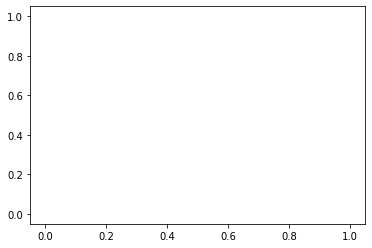

In [9]:
sns.distplot(data['MasVnrArea'])

In [ ]:
sns.distplot(data['MasVnrArea'].fillna(103.68))

In [10]:
data['MasVnrArea'].value_counts()


0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

ValueError: cannot convert float NaN to integer

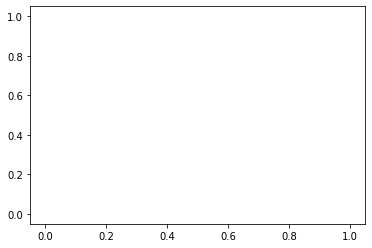

In [11]:
sns.distplot(data['LotFrontage'])

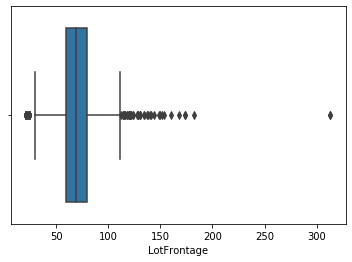

In [12]:
sns.boxplot(data['LotFrontage'])

In [13]:
data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

ValueError: cannot convert float NaN to integer

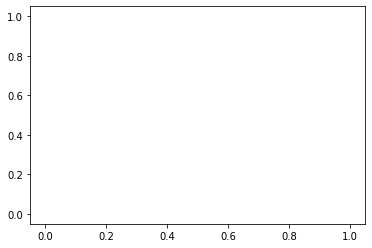

In [14]:
sns.distplot(data['LotFrontage']).fillna(0)

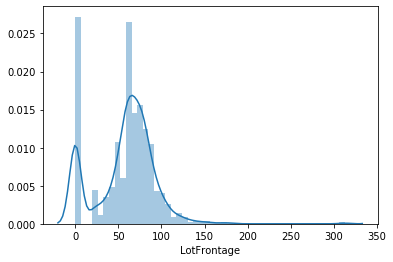

In [15]:
sns.distplot(data['LotFrontage'].fillna(0))

In [16]:
#find street type where LotFrontage is null
# filter 1: to get index od rows with nullin LotFrontage
nullFilter=data.LotFrontage.isnull()
df = data[nullFilter]
df.Street.value_counts()

Pave    258
Grvl      1
Name: Street, dtype: int64

In [17]:
print(nullFilter)

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: LotFrontage, Length: 1460, dtype: bool


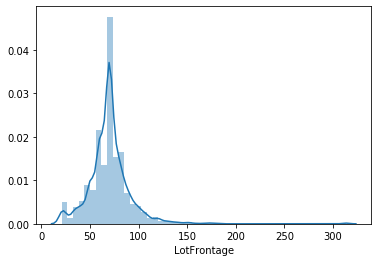

In [18]:
sns.distplot(data['LotFrontage'].fillna(70))

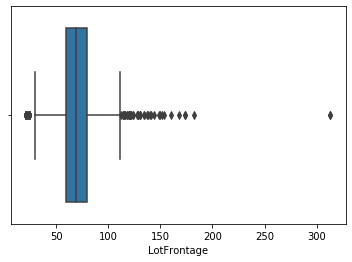

In [19]:
sns.boxplot(data['LotFrontage'])

In [20]:
#
nullFilter1=data.LotFrontage>300
sub_df = data[nullFilter1]
sub_df.Street.value_counts()

Pave    2
Name: Street, dtype: int64

In [21]:
sub_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


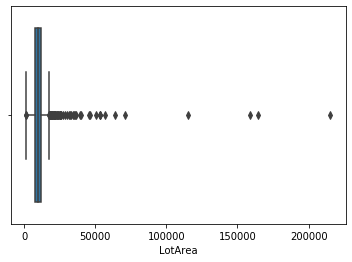

In [22]:
sns.boxplot(data['LotArea'])

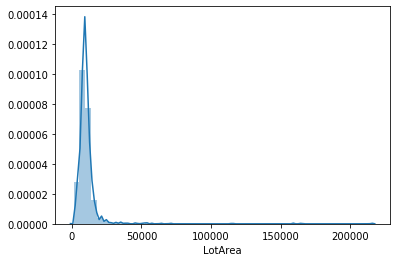

In [23]:
sns.distplot(data['LotArea'])

In [24]:
nullFilter2= data.LotArea >100000
sub_df1 = data[nullFilter2]
#sub_df1.Street.value_counts()
sub_df1.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000


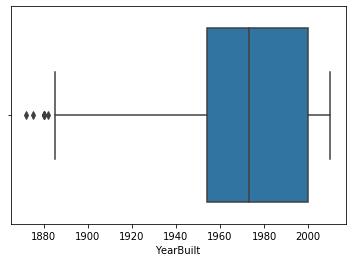

In [25]:
sns.boxplot(data['YearBuilt'])

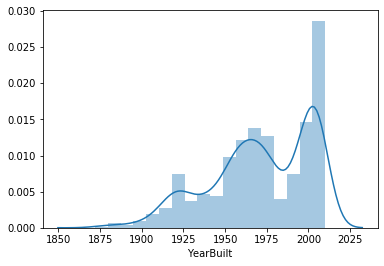

In [26]:
sns.distplot(data['YearBuilt'])

In [27]:
X_train = data[['LotFrontage','LotArea','YearBuilt']] 

X_train.head()
X_train.describe()

,LotFrontage,LotArea,YearBuilt
count,1201.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808
std,24.284752,9981.264932,30.202904
min,21.000000,1300.000000,1872.000000
25%,59.000000,7553.500000,1954.000000
50%,69.000000,9478.500000,1973.000000
75%,80.000000,11601.500000,2000.000000
max,313.000000,215245.000000,2010.000000


In [28]:
X_train.info()

X_train['LotFrontage'].fillna(70,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
LotFrontage    1201 non-null float64
LotArea        1460 non-null int64
YearBuilt      1460 non-null int64
dtypes: float64(1), int64(2)
memory usage: 34.3 KB


C:\Users\bhagawat_dayal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [29]:
X_train.info()
Y_train = data['SalePrice']

Y_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
LotFrontage    1460 non-null float64
LotArea        1460 non-null int64
YearBuilt      1460 non-null int64
dtypes: float64(1), int64(2)
memory usage: 34.3 KB


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [30]:
X_train['YearBuilt'] = X_train['YearBuilt'].apply(lambda x: (2019-x))

C:\Users\bhagawat_dayal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
print(X_train['YearBuilt'])

0        16
1        43
2        18
3       104
4        19
       ... 
1455     20
1456     41
1457     78
1458     69
1459     54
Name: YearBuilt, Length: 1460, dtype: int64


In [32]:
# Initialize model
regression_model = linear_model.LinearRegression()

regression_model.fit(X_train, Y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

171902.0422550891
[  788.3752668      1.51046482 -1300.69059275]


In [33]:

regression_model.score(X = X_train, 
                       y = Y_train)

0.38184234663746275

In [34]:
X_train['LotFrontage'].drop(>300,inplace=True)

SyntaxError: invalid syntax (<ipython-input-34-f1503be26761>, line 1)

In [35]:
nullFilter3=data.LotFrontage>300
sub_df0 = data[nullFilter3]
sub_df0.Street.value_counts()

Pave    2
Name: Street, dtype: int64

In [36]:
X_train.drop(X_train.LotFrontage>300,inplace=True)

KeyError: '[False False False ... False False False] not found in axis'

In [37]:
d=data.copy()
olFilter=data.LotArea>100000
tdf=d.drop(d[olFilter].index)
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
Id               1456 non-null int64
MSSubClass       1456 non-null int64
MSZoning         1456 non-null object
LotFrontage      1200 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null object
Alley            91 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
Utilities        1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-n

In [38]:
d=data.copy()
#olFilter=data.LotArea>100000
tdf=d.drop(d[data.LotArea>100000].index)
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 81 columns):
Id               1456 non-null int64
MSSubClass       1456 non-null int64
MSZoning         1456 non-null object
LotFrontage      1200 non-null float64
LotArea          1456 non-null int64
Street           1456 non-null object
Alley            91 non-null object
LotShape         1456 non-null object
LandContour      1456 non-null object
Utilities        1456 non-null object
LotConfig        1456 non-null object
LandSlope        1456 non-null object
Neighborhood     1456 non-null object
Condition1       1456 non-null object
Condition2       1456 non-null object
BldgType         1456 non-null object
HouseStyle       1456 non-null object
OverallQual      1456 non-null int64
OverallCond      1456 non-null int64
YearBuilt        1456 non-null int64
YearRemodAdd     1456 non-null int64
RoofStyle        1456 non-null object
RoofMatl         1456 non-null object
Exterior1st      1456 non-n

In [39]:
X_train = tdf[['LotFrontage','LotArea','YearBuilt']] 
Y_train = tdf['SalePrice']

In [40]:
X_train['YearBuilt'] = X_train['YearBuilt'].apply(lambda x: (2019-x))

C:\Users\bhagawat_dayal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
X_train['LotFrontage'].fillna(70,inplace=True)

C:\Users\bhagawat_dayal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [42]:
# Initialize model
regression_model = linear_model.LinearRegression()

regression_model.fit(X_train, Y_train)

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

166694.29867707874
[  550.91038956     3.70749486 -1301.02423084]


In [43]:
regression_model.score(X = X_train, 
                       y = Y_train)

0.40507697440547774

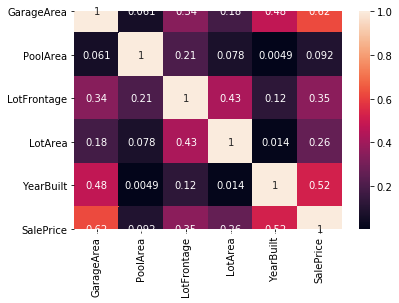

In [51]:
# Lets find how feature are dependednt on each othere
# how Y -> salesprice is dependet on X -> 'GarageArea','PoolArea','LotFrontage','LotArea','YearBuilt'
import seaborn as sns
# Scatter diagram for this purpose
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
# Create feature to be added for scatter
attributes=['GarageArea','PoolArea','LotFrontage',
            'LotArea','YearBuilt','SalePrice']

# Now create scatter diagram
#scatter_matrix(trainData[attributes],alpha=0.8,figsize=(12,12))


ax = sns.heatmap(data[attributes].corr(),annot=True)
plt.show()

In [ ]:
#homework: priotize the numarical variable into (P1, P2,P3....) and prepare model with priotized variavle

In [ ]:
# K-FOLD method for validation 
# learning curve : 

In [52]:
!pip install yellowbrick

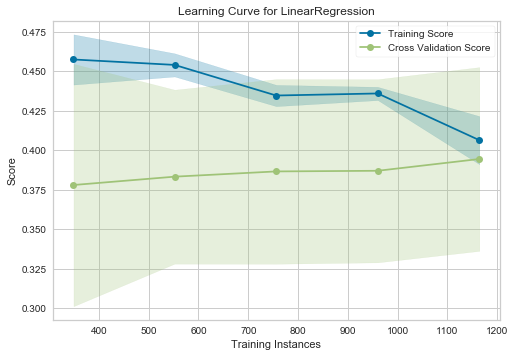

In [54]:
from yellowbrick.model_selection import LearningCurve
#poly_regression_model_out.score(X = X_train_poly_out, y = Y_train_Out)
#n_jobs is to assign number of CPUs
viz = LearningCurve(
    regression_model, cv = 5, train_sizes=np.linspace(0.3, 1.0, num=5),
    scoring='r2', n_jobs=4
)
# Fit and poof the visualizer
viz.fit(X = X_train, y = Y_train)
viz.poof()

In [ ]:
# training score should not go down as dataset is increasing.... if this is the case, we have to include more features.